In [4]:
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

In [70]:
picPath = './gloves/gloves_2.jpg'
compress = cv.IMREAD_REDUCED_COLOR_4
iter = 1
pic = cv.imread(picPath, compress)

roi = cv.selectROI(windowName="roi", img=pic, showCrosshair=True, fromCenter=False)

(681, 909, 3)


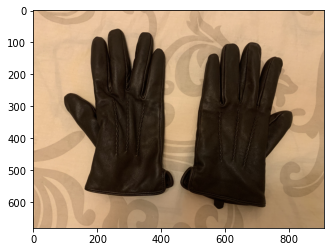

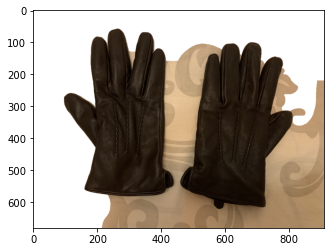

In [69]:
picPath = './gloves/gloves_2.jpg'
compress = cv.IMREAD_REDUCED_COLOR_4
iter = 1
pic = cv.imread(picPath, compress)
print( pic.shape )
plt.figure()
plt.imshow(pic[:,:, ::-1])

mask = np.zeros(pic.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (1, 1, pic.shape[1], pic.shape[0])

cv.grabCut(pic, mask, rect, bgdModel, fgdModel, 10, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
row, col, channel = pic.shape
for i in range(row):
    for j in range(col):
        if mask2[i, j] == 0:
            for k in range(channel):
                pic[i, j, k] = 255
plt.figure()
plt.imshow(pic[:,:,::-1])

In [38]:
def process(picPath, compress = cv.IMREAD_REDUCED_COLOR_2, iter = 15):
    pic = cv.imread(picPath, compress)
    print( pic.shape )
    plt.figure()
    plt.imshow(pic[:,:, ::-1])

    mask = np.zeros(pic.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    rect = (1, 1, pic.shape[1], pic.shape[0])

    cv.grabCut(pic, mask, rect, bgdModel, fgdModel, iter, cv.GC_INIT_WITH_RECT)
    
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    row, col, channel = pic.shape
    for i in range(row):
        for j in range(col):
            if mask2[i, j] == 0:
                for k in range(channel):
                    pic[i, j, k] = 255
    plt.figure()
    plt.imshow(pic[:,:,::-1])

(1182, 1281, 3)


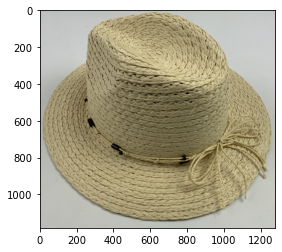

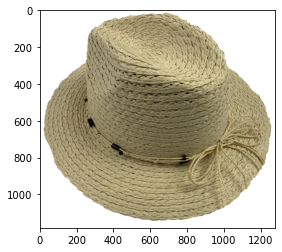

In [39]:
process('./batchTest/hat_2.jpg')

(1356, 1441, 3)


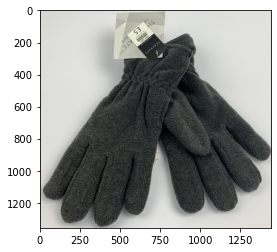

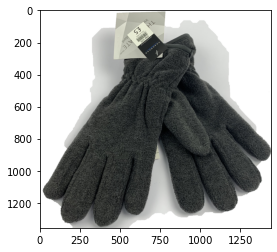

In [40]:
process('./gloves/gloves_1.jpg')

![](./archive/imread.png)
